In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [1]:
##iostream function shouild be initialize the fucntion and cvreative the i
import pandas as pd
import numpy as np
#import matplotlib.plot as plt


In [2]:
import time
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward
import sklearn
import sklearn.datasets
import sklearn.linear_model


import csv
np.random.seed(1)

In [3]:
train=pd.read_csv('/home/aman/Downloads/titanic/train.csv')

In [4]:
test=pd.read_csv('/home/aman/Downloads/titanic/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [10]:
def data_bar(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(df.plot(kind='bar',stacked=True, figsize=(10,5)))
    

KeyError: <matplotlib.axes._subplots.AxesSubplot object at 0x7f09faf82ad0>

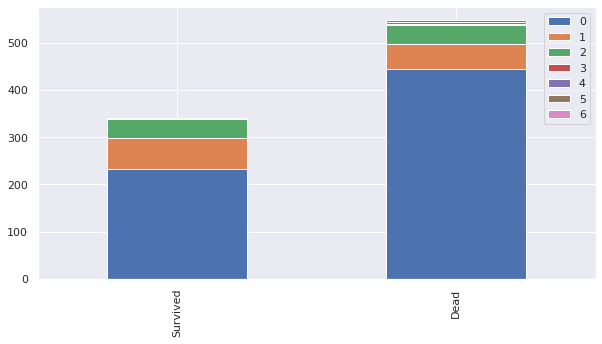

In [11]:
data_bar('Parch')

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
train.shape

(891, 12)

In [15]:
test.shape

(418, 11)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
train_data_set=[train,test]    ###cobining the trainig data and test data sets 

# 2. Name

In [18]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
dataset['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


###### 3wwwwwwwwwwwwwwwwwwww

what should we do after the funtion of the greatest

In [21]:
dataset[dataset['Title']=='Miss']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
18,910,3,"Ilmakangas, Miss. Ida Livija",female,27.0,1,0,STON/O2. 3101270,7.9250,NaN,S,Miss
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,Miss
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,Miss
37,929,3,"Cacic, Miss. Manda",female,21.0,0,0,315087,8.6625,NaN,S,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C,Miss
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,Miss
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,Miss
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,Miss


In [22]:
np.mean(dataset['Age'])

30.272590361445783

In [23]:
title_mapping={"Mr": 0,
"Miss": 1,
"Mrs": 2,
"Master": 3,
"Rev" : 3,
"Col": 3,
"Dr": 3,
"Ms": 3,
"Dona": 3 }

In [24]:
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [26]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [27]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,0


# 3. Sex

In [28]:
sex_mapping={'male': 0,'female': 1}

In [29]:
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping) ### here we convert male and female  into 0 & 1


In [30]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2.0


#  4. Age

Age: considering the age and fill up the blank column

In [31]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [32]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2.0


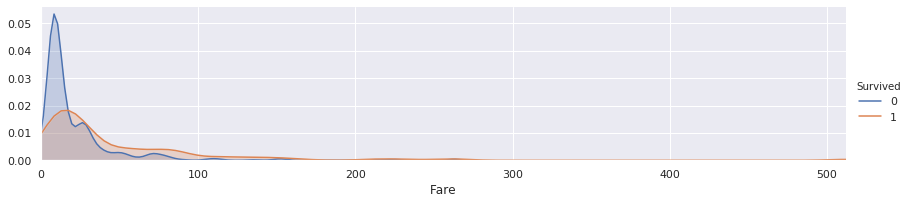

In [33]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

(0, 20)

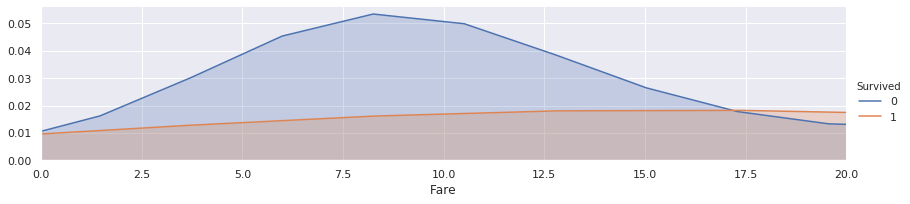

In [34]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0, 30)

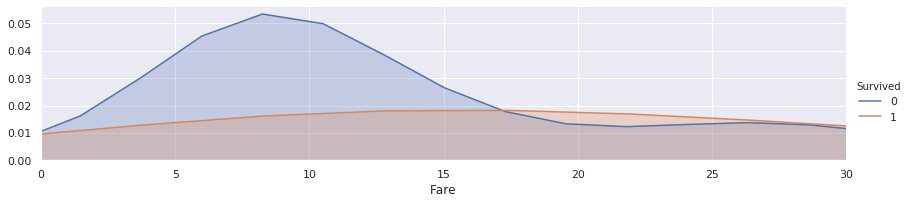

In [35]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0, 512.3292)

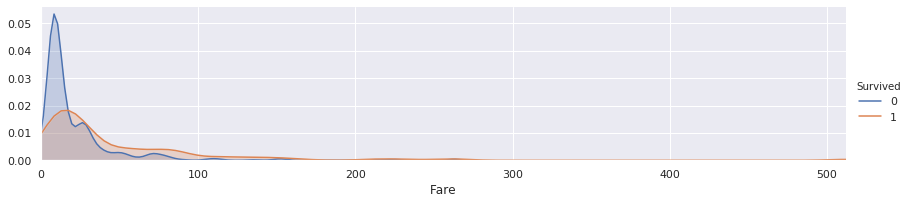

In [36]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [37]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]


In [38]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,0,54.0,0,0,17463,51.8625,E,S,0.0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2.0


In [39]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

# 4. Embark

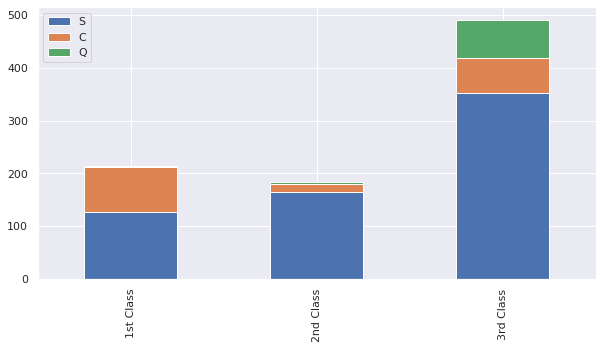

In [40]:
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st Class','2nd Class','3rd Class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [41]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')   
    

In [42]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,0,3.0,0,0,17463,51.8625,E,S,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2.0


In [43]:
embark_mapping={'S':0,'C':1,'Q':2}

In [44]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embark_mapping)

In [45]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C,0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0.0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0.0
6,7,0,1,0,3.0,0,0,17463,51.8625,E,0,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3.0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2.0
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2.0


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Title          880 non-null float64
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


(0, 512.3292)

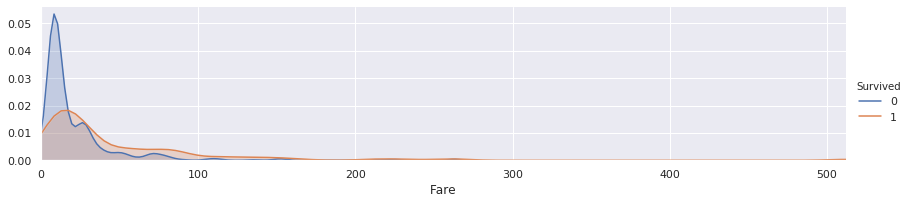

In [47]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [48]:
train['Title']=train['Title'].fillna(3)
test['Title']=test['Title'].fillna(3)

In [49]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C,0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,0,3.0
887,888,1,1,1,1.0,0,0,112053,30.0000,B,0,1.0
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,0,1.0
889,890,1,1,0,1.0,0,0,111369,30.0000,C,1,0.0


# 5. Cabin

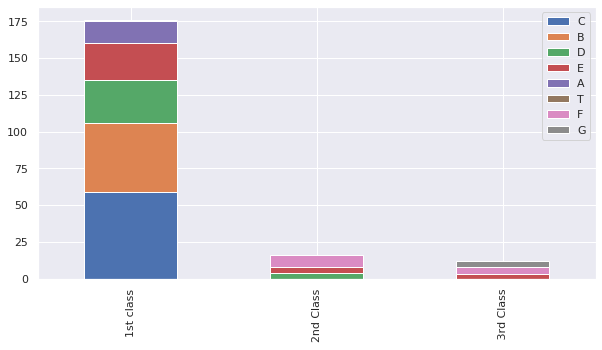

In [50]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd Class',' 3rd Class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [51]:
cabin_mapping={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4,'T':2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [52]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
Title          891 non-null float64
dtypes: float64(4), int64(7), object(1)
memory usage: 83.7+ KB


# 6.Family Size

In [54]:
train['Familysize']=train['SibSp']+train['Parch']+1
test['Familysize']=test['SibSp']+test['Parch']+1

(0, 11.0)

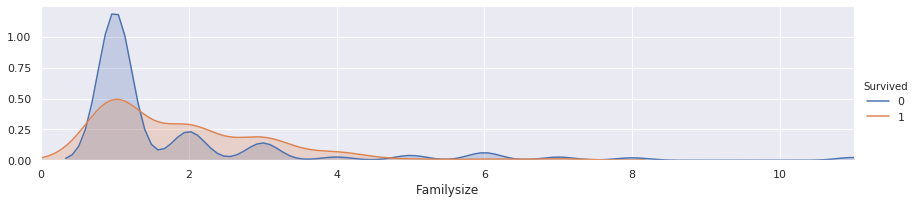

In [55]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Familysize',shade= True)
facet.set(xlim=(0, train['Familysize'].max()))
facet.add_legend()
plt.xlim(0)

In [56]:
family_mapping={1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2.0, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4.0}

In [57]:
for dataset in train_test_data:
    dataset['Familysize']=dataset['Familysize'].map(family_mapping)
    
    

In [58]:
feature_drop=['SibSp','Parch','Ticket']
train=train.drop(feature_drop,axis=1)
test=test.drop(feature_drop,axis=1)
train=train.drop(['PassengerId'],axis=1)

In [59]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,0,3,0,1.0,7.2500,2.0,0,0.0,0.4
1,1,1,1,3.0,71.2833,0.8,1,2.0,0.4
2,1,3,1,1.0,7.9250,2.0,0,1.0,0.0
3,1,1,1,2.0,53.1000,0.8,0,2.0,0.4
4,0,3,0,2.0,8.0500,2.0,0,0.0,0.0
5,0,3,0,2.0,8.4583,2.0,2,0.0,0.0
6,0,1,0,3.0,51.8625,1.6,0,0.0,0.0
7,0,3,0,0.0,21.0750,2.0,0,3.0,1.6
8,1,3,1,2.0,11.1333,2.0,0,2.0,0.8
9,1,2,1,0.0,30.0708,1.8,1,2.0,0.4


In [60]:
train_data=train.drop('Survived',axis=1)
target=train['Survived']

In [61]:
target.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [62]:
X=np.array(train_data)

In [63]:
Y=np.array(target)

In [64]:
Y=Y.reshape((891,1))

In [65]:
target[823]

1

In [66]:
Y[823]

array([1])

In [67]:
l=np.array([1,2,2,3,3,3,4,4,4,4])
l.reshape((10,1))

array([[1],
       [2],
       [2],
       [3],
       [3],
       [3],
       [4],
       [4],
       [4],
       [4]])

In [68]:
X_train=X.T

In [69]:
X_train.shape

(8, 891)

In [70]:
print(Y.shape)

(891, 1)


In [71]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [72]:
z=np.random.randn(8,8)

In [73]:
sigmoid(z)

(array([[0.83539354, 0.35165864, 0.3709434 , 0.25483894, 0.70378922,
         0.09099561, 0.85129722, 0.31838429],
        [0.57909005, 0.43797848, 0.81185487, 0.11303172, 0.42008677,
         0.40514941, 0.75653387, 0.24976027],
        [0.45699943, 0.29362176, 0.51055187, 0.64171493, 0.2496239 ,
         0.75854586, 0.71127629, 0.62304533],
        [0.71112537, 0.33542979, 0.46931605, 0.28175569, 0.43342564,
         0.62956602, 0.33366373, 0.40209259],
        [0.33466232, 0.30043955, 0.33821787, 0.49683389, 0.24651053,
         0.55833703, 0.84021145, 0.6774427 ],
        [0.45218765, 0.29159937, 0.32144081, 0.84454669, 0.51269921,
         0.34592599, 0.54758443, 0.89092797],
        [0.53000365, 0.64958217, 0.57448415, 0.41283695, 0.24185832,
         0.41354182, 0.44796552, 0.64258997],
        [0.69825107, 0.71729882, 0.5709155 , 0.70788646, 0.31986377,
         0.77779596, 0.62549304, 0.42602377]]),
 array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
    

In [128]:
n_x=X_train.shape[0]
n_h=(120,120)
n_y=Y.shape[0]
dims=(n_x,1000,80,1000,n_y)

In [127]:
dims[3]

1

In [85]:
def initialize_with_he(dims):
    
    L=len(dims)
    parameters={}
    for i in range(1,L):
        parameters['W'+str(i)]=np.random.randn(dims[i],dims[i-1])*0.1
        parameters['b'+str(i)]=np.zeros((dims[i],1))
        
        assert(parameters['W' + str(i)].shape == (dims[i], dims[i-1]))
        assert(parameters['b' + str(i)].shape == (dims[i], 1))
    
    return parameters

In [86]:
parameters=initialize_with_he(dims)

In [87]:
parameters["W3"].shape

(1, 10)

In [88]:
def linear_forward(A, W, b):
    

    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [89]:
W1=parameters["W1"]
b1=parameters["b1"]
W2=parameters["W2"]
b2=parameters["b2"]
W3=parameters['W3']
b3=parameters["b3"]

In [83]:
Z1=np.dot(W1,X_train)+b1

In [84]:
A1, activation_cache = relu(Z1)

In [85]:
Z2=np.dot(W2,A1)+b2

In [86]:
A2, activation_cache = relu(Z2)

In [87]:
Z3=np.dot(W3,A2)+b3

In [88]:
A3,activation_cache=sigmoid(Z3)

In [89]:
compute_cost(A3,Y)

array(0.75345142)

In [124]:
a=np.array([1,2,3,4,5])
y=np.array([1,1,0,0,1])

In [125]:
a*y

array([1, 2, 0, 0, 5])

In [130]:
tl=(1-Y)*np.log(1-A3)

/home/aman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


In [131]:
tl

array([[ -4.63350613,          nan,  -0.        ,  -0.        ,
         -4.76978439,  -5.22526743, -34.43421548, -14.34543545,
         -0.        ,  -0.        ,  -0.        ,  -0.        ,
         -4.97693571, -21.17219068,  -5.56784618,  -0.        ,
        -20.41202951,  -0.        , -11.75460149,  -0.        ,
        -17.05542623,  -0.        ,  -0.        ,  -0.        ,
        -15.25745472,  -0.        ,  -4.32358454,         -inf,
         -0.        ,  -4.67121217, -17.37003452,          nan,
         -0.        ,  -6.91896287,         -inf, -34.09774324,
         -0.        ,  -4.97693571, -12.41480704,  -0.        ,
         -6.14682192, -14.08065174,  -4.74557203,  -0.        ,
         -0.        ,  -4.76978439, -10.29989852,  -0.        ,
        -14.44817467, -11.89505719, -27.00256041,  -4.8015091 ,
                 nan,  -0.        ,         -inf,  -0.        ,
         -0.        ,  -4.32579513,  -0.        , -32.30598377,
         -4.58186822,          nan,     

In [90]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache =linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [91]:
def L_model_forword(X,parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2                  
    
    
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], activation = "relu")
        caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation = "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
    #cache=(Z1,A1,W1,b1,Z2,A2,W2,b2,Z3,A3,W3,b3)
            
    return AL, caches
    

In [92]:
AL,caches=L_model_forward(X_train, parameters)

In [93]:
W1=parameters["W1"]
b1=parameters['b1']
W2=parameters['W2']
b2=parameters['b2']
W3=parameters['W3']
b3=parameters['b3']

In [176]:
Z = np.dot(W1,X_train)+b1

In [177]:
Z.shape

(20, 891)

In [94]:
def compute_cost(AL, Y):
    np.seterr(divide = 'ignore') 
    
    m=Y.shape[1]
    cost =-sum((Y*np.log(AL)+(1-Y)*(np.log(1-AL))).T)/m
    
    cost=np.squeeze(cost)
    cost=np.mean(cost)
    assert(cost.shape==())
    
    return cost     
    

In [95]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = np.sum(dZ,axis=1,keepdims=True)*(1/m)
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [96]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [97]:
def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dAL = -(np.divide(Y,AL)-np.divide(1-Y,1-AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [98]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] =parameters["W" + str(l+1)]- learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]- learning_rate*grads["db" + str(l+1)]
    ### END CODE HERE ###
    return parameters

In [99]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_with_he(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.753451
Cost after iteration 100: 0.661131
Cost after iteration 200: 0.643639
Cost after iteration 300: 0.629087
Cost after iteration 400: 0.617025
Cost after iteration 500: 0.607010
Cost after iteration 600: 0.598369
Cost after iteration 700: 0.590282
Cost after iteration 800: 0.581841
Cost after iteration 900: 0.572503
Cost after iteration 1000: 0.560254
Cost after iteration 1100: 0.547047
Cost after iteration 1200: 0.532484
Cost after iteration 1300: 0.525210
Cost after iteration 1400: 0.523039
Cost after iteration 1500: 0.517985
Cost after iteration 1600: 0.512198
Cost after iteration 1700: 0.503644
Cost after iteration 1800: 0.499854
Cost after iteration 1900: 0.497570
Cost after iteration 2000: 0.493767
Cost after iteration 2100: 0.494208
Cost after iteration 2200: 0.488672
Cost after iteration 2300: 0.486128
Cost after iteration 2400: 0.481914
Cost after iteration 2500: 0.480850
Cost after iteration 2600: 0.478214
Cost after iteration 2700: 0.474601
Cost

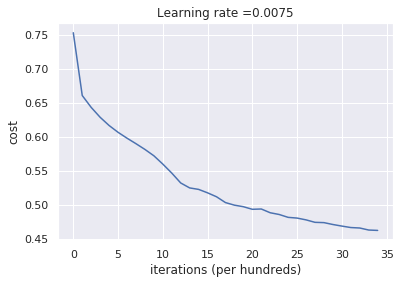

In [100]:
parameters = L_layer_model(X_train, Y,dims, num_iterations = 3500, print_cost = True)

In [101]:
parameters

{'W1': array([[ 1.61037657e-01, -6.11756414e-02, -5.60103238e-02,
         -1.04296035e-01,  8.50469210e-02, -2.29801523e-01,
          1.77200427e-01, -7.59797516e-02],
        [ 4.00350345e-02, -2.49370375e-02,  1.60655224e-01,
         -2.06014071e-01, -2.56935098e-02, -3.84054355e-02,
          1.13508902e-01, -1.09989127e-01],
        [-4.15396232e-02,  2.27062559e-02, -1.71787977e-02,
          2.08954980e-02, -1.01368120e-01,  1.32778614e-01,
          1.91744955e-01, -4.32146490e-03],
        [ 9.04488190e-02, -6.83727859e-02, -1.23939925e-02,
         -9.35769434e-02, -2.64963127e-02,  5.30355467e-02,
         -6.91660752e-02, -3.96753527e-02],
        [-1.09476843e-01,  4.29359775e-01, -1.13720624e-01,
          7.16157676e-02, -2.81913440e-02,  1.30490942e-01,
          6.03298681e-01, -1.81555442e-01],
        [ 3.41261208e-02, -3.08384568e-01, -4.78186553e-02,
          9.56909088e-02, -1.11816950e-02, -9.12894554e-02,
         -1.53536985e-01,  3.30786791e-01],
        [ 

In [80]:
Y=Y.T

In [81]:
Y.shape

(1, 891)

In [82]:
X_train.shape

(8, 891)

In [102]:
def propagate(parameters, X, Y):
    #print("propagate")
    AL,caches=L_model_forword(X,parameters)
    cost=compute_cost(AL,Y)
    grads= L_model_backward(AL, Y, caches)
    
    return grads, cost

In [103]:
Y.shape

(1, 891)

In [104]:
grads,cost=propagate(parameters,X_test, y_t)

NameError: name 'X_test' is not defined

In [128]:
cost

nan

In [105]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [104]:
clf = svm.SVC(kernel="linear",C=2000) 

In [108]:
X_tl, X_dev, y_tl, y_dev = train_test_split(X_train.T, Y.T, test_size=0.2,random_state=109) 

In [109]:
X_dev.shape

(179, 8)

In [123]:
clf.fit(X_t, y_t)

/home/aman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [124]:
y_pred = clf.predict(X_dev)

In [100]:
np.where(np.isnan(X_test))

NameError: name 'X_test' is not defined

In [111]:
X_test=np.nan_to_num(X_test)

In [95]:
from sklearn import metrics

In [125]:
metrics.accuracy_score(y_dev,y_pred)

0.8097014925373134

In [135]:
y_pri=clf.predict(X_test)

In [156]:
from sklearn.svm import SVC

In [157]:
svm_bias = SVC(kernel="rbf", gamma="auto", C=1)


In [158]:
svm_bias.fit(X_train.T, Y.T)

/home/aman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [159]:
y_pred=svm_bias.predict(X_test)

In [124]:
y_t.T

array([[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [129]:
grads

{'dA2': array([[-0.02739925,  0.25388264, -0.01679814, ..., -0.03935884,
         -0.0451521 , -0.29945136],
        [ 0.00194897, -0.01805924,  0.00119489, ...,  0.00279968,
          0.00321177,  0.02130065],
        [-0.00786105,  0.07284081, -0.00481951, ..., -0.01129234,
         -0.01295447, -0.08591481],
        ...,
        [ 0.01195309, -0.11075788,  0.00732829, ...,  0.01717054,
          0.01969788,  0.13063751],
        [ 0.00774062, -0.07172489,  0.00474568, ...,  0.01111934,
          0.01275601,  0.0845986 ],
        [ 0.00141756, -0.01313517,  0.00086909, ...,  0.00203631,
          0.00233604,  0.01549276]]),
 'dW3': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan]]),
 'db3': arr

In [84]:
grads['dw'].shapgrads = {"dw": dw,
             "db": db}e

SyntaxError: invalid syntax (<ipython-input-84-2e3d5cc61a6d>, line 2)

In [130]:
def optimize(parameters, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(parameters, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        #dw = grads["dw"]
        #db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        parameters=update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return parameters, grads, costs

In [131]:
params, grads, costs = optimize(parameters, X_train, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

In [132]:
def predict(parameters, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- dictions (0/1) a numpy array (vector) containing all prefor the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    #w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A,caches = L_model_forword(X,parameters)
    ### END CODE HERE ###
    
    for i in range(0,A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if(A[0,i]<=0.5).any():
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
        pass
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [133]:
def model(X_train, Y_train, X_test, Y_test,dims, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    parameters = initialize_with_he(dims)
    

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(parameters, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(parameters, X_test)
    Y_prediction_train = predict(parameters, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "parameters": parameters,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [129]:
d = model(X_tl.T,y_tl.T,X_dev,y_dev.T,dims, num_iterations = 15000, learning_rate = 0.075, print_cost = True)

/home/aman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/home/aman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/aman/anaconda3/dnn_utils_v2.py:77: RuntimeWarning: invalid value encountered in multiply
  dZ = dA * s * (1-s)


Cost after iteration 0: nan
Cost after iteration 100: nan


KeyboardInterrupt: 

In [116]:
X_dev=X_dev.T

In [120]:
y_dev=y_dev.T

In [150]:
y_dev.shape

(1, 179)

In [123]:
y_tl.shape

(712, 1)

In [147]:
Y_prediction_test = predict(parameters, X_dev)

In [148]:
Y_prediction_test.shape

(1, 179)

In [146]:
from sklearn import metrics

In [151]:
metrics.accuracy_score(y_dev.T,Y_prediction_test.T)

0.8603351955307262

In [134]:
def compute_cost_with_regularization(Al , Y, lambd=0.07):
    #print("MY name is aman")
    m=Y.shape[1]
    W1=parameters["W1"]
    W2=parameters["W2"]
    W3=parameters["W3"]
    
    cross_entropy=compute_cost(Al, Y)
    ##print("cross entropy: ",cross_entropy.shape)
    
    ## now defing the regularization in the fub=nction
    regularization= (np.sum(np.square(W1)))+(np.sum(np.square(W2)))+(np.sum(np.square(W3)))
    
    ## now defing the regularization
    cost=cross_entropy + regularization*(lambd/(2*m))
    
    return cost

In [135]:
def forword_propagation_with_dropout(X,parameters,keep_prob):
    # probagation ->RELU -> DROPOUT-> propagation ->RELU -> DROPOUT ->propagation ->sigmoid
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    W3=parameters["W3"]
    b3=parameters["b3"]
    
    Z1=np.dot(W1,X)+b1
    A1,cache=relu(Z1)
    ## dropout------
    D1=np.random.rand(A1.shape[0],A1.shape[1])
    D1=(D1<keep_prob).astype(int)
    A1=np.multiply(A1,D1)
    A1=A1/keep_prob
    ##dropout......
    
    Z2=np.dot(W2,A1)+b2
    A2,cache=relu(Z2)
    ##dropout....
    D2=np.random.rand(A2.shape[0],A2.shape[1])
    D2=(D2<keep_prob).astype(int)
    A2=np.multiply(A2,D2)
    A2=A2/keep_prob
    ## dropout....
    
    Z3=np.dot(W3,A2)+b3
    A3,cache=sigmoid(Z3)
    
    caches=(Z1,D1,A1,W1,b1,Z2,D2,A2,W2,b2,Z3,A3,W3,b3)
    
    
    return A3,caches

In [136]:
parameters

{'W1': array([[ 1.61038990e-01, -6.11756414e-02, -5.62623768e-02,
         -1.04048901e-01,  8.50185168e-02, -2.29772506e-01,
          1.77260251e-01, -7.59681446e-02],
        [ 4.04004465e-02, -2.49370375e-02,  1.61751333e-01,
         -2.06014071e-01, -2.53638164e-02, -3.84054355e-02,
          1.13807694e-01, -1.09989127e-01],
        [-4.22104689e-02,  2.59409997e-02, -1.80987286e-02,
          1.94274718e-02, -1.00874491e-01,  1.32650218e-01,
          1.93081704e-01, -6.60058654e-03],
        [ 9.04586468e-02, -6.83727859e-02, -1.23808361e-02,
         -9.35769434e-02, -2.65029950e-02,  5.30355467e-02,
         -6.91660752e-02, -3.96753527e-02],
        [-1.16143260e-01,  4.53828511e-01, -1.20245394e-01,
          6.12679396e-02, -2.66367669e-02,  1.33378666e-01,
          6.12139499e-01, -1.97884191e-01],
        [ 3.86182738e-02, -3.21390029e-01, -4.56240246e-02,
          8.68581482e-02, -1.15677557e-02, -9.09403772e-02,
         -1.58389963e-01,  3.40276340e-01],
        [ 

In [137]:
Al,caches=forword_propagation_with_dropout(X_train,parameters,keep_prob=0.8)

In [138]:
Al,caches=forword_propagation(X,parameters)

NameError: name 'forword_propagation' is not defined

In [169]:
Al.shape

(1, 891)

In [119]:
Y.shape

(1, 891)

In [189]:
cost=compute_cost_with_regularization(Al,Y,lambd=0.07)

In [190]:
cost

0.659244188975946

In [133]:
grads=backword_propagation_with_regularization(X_train,Y,caches,lambd=0.07)

In [134]:
parameters=update_parameters(parameters,grads,learning_rate=0.0075)

In [135]:
parameters

{'W1': array([[ 1.61023201e-01, -6.11762306e-02, -5.61405704e-02,
         -1.04211481e-01,  8.50221083e-02, -2.29792115e-01,
          1.77215264e-01, -7.59763419e-02],
        [ 4.02180397e-02, -2.49376268e-02,  1.61207922e-01,
         -2.06014660e-01, -2.55283517e-02, -3.84060247e-02,
          1.13660147e-01, -1.09989716e-01],
        [-4.22584916e-02,  2.43478149e-02, -1.78632996e-02,
          2.27829427e-02, -1.01389164e-01,  1.32692205e-01,
          1.92357864e-01, -5.62629138e-03],
        [ 9.04529513e-02, -6.83733751e-02, -1.23888288e-02,
         -9.35775327e-02, -2.65005042e-02,  5.30349574e-02,
         -6.91666644e-02, -3.96759419e-02],
        [-1.15150429e-01,  4.41587783e-01, -1.18405628e-01,
          7.82976356e-02, -2.90830990e-02,  1.31718521e-01,
          6.07113656e-01, -1.90675099e-01],
        [ 3.75576434e-02, -3.14948782e-01, -4.60772887e-02,
          7.97746036e-02, -1.05256933e-02, -9.11110469e-02,
         -1.55781238e-01,  3.36075385e-01],
        [ 

In [193]:
a=23
b=47
s=(a,b)

In [195]:
r,t=s

In [196]:
r

23

In [139]:
def forword_propagation(X,parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    W3=parameters["W3"]
    b3=parameters["b3"]
    
    Z1=np.dot(W1,X)+b1
    A1,cache=relu(Z1)
    
    Z2=np.dot(W2,A1)+b2
    A2,cache=relu(Z2)
    
    Z3=np.dot(W3,A2)+b3
    A3,cache=sigmoid(Z3)
    
    cache=(Z1,A1,W1,b1,Z2,A2,W2,b2,Z3,A3,W3,b3)
    
    return A3,cache
    
    

In [140]:
def backword_propagation_with_regularization(X,Y,caches,lambd=0):
    
    m=X.shape[1]
    (Z1,A1,W1,b1,Z2,A2,W2,b2,Z3,A3,W3,b3)=caches
    
    dZ3=A3-Y
    dW3=1./m * np.dot(dZ3,A2.T)+((lambd*W3)/m)
    db3=1./m * np.sum(dZ3,axis=1,keepdims=True)
    
    dA2=np.dot(W3.T,dZ3)
    dZ2=np.multiply(dA2,np.int64(A2>0))
    dW2=1./m * np.dot(dZ2,A1.T)+((lambd*W2)/m)
    db2=1./m * np.sum(dZ2,axis=1,keepdims=True)
    
    dA1=np.dot(W2.T,dZ2)
    dZ1=np.multiply(dA1,np.int64(A1>0))
    dW1=1./m * np.dot(dZ1,X.T)+((lambd)/m)
    db1=1./m * np.sum(dZ1,axis=1,keepdims=True)
    
    gradients={ "dZ3":dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
               "dZ2":dZ2, "dW2": dW2, "db2": db2, "dA1": dA1,
                "dZ1":dZ1, "dW1": dW1, "db1": db1}
        
    return gradients

In [141]:
def backword_propagation_with_dropout(X,Y,caches,keep_prob):
    
    m=X.shape[1]
    (Z1,D1,A1,W1,b1,Z2,D2,A2,W2,b2,Z3,A3,W3,b3)=caches
    
    dZ3=A3-Y
    dW3=1./m * np.dot(dZ3,A2.T)
    db3=1./m * np.sum(dZ3,axis=1,keepdims=True)
    ##db3=np.sum(dZ,axis=1,keepdims=True)*(1/m)
    
    dA2=np.dot(W3.T,dZ3)
    ##Dropout
    dA2=dA2*D2
    dA2=dA2/keep_prob
    dZ2=np.multiply(dA2,np.int64(A2>0))
    dW2=1./m * np.dot(dZ2,A1.T)
    db2=1./m * np.sum(dZ2,axis=1,keepdims=True)
    
    dA1=np.dot(dW2.T,dZ2)
    ##dropout
    dA1=dA1*D1
    dA1=dA1/keep_prob
    dZ1=np.multiply(dA1,np.int64(A1>0))
    dW1=1./m * np.dot(dZ1,X.T)
    db1=1./m * np.sum(dZ1,axis=1,keepdims=True)
    
    gradients={ "dZ3":dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
               "dZ2":dZ2, "dW2": dW2, "db2": db2, "dA1": dA1,
                "dZ1":dZ1, "dW1": dW1, "db1": db1}
     
    return gradients
    
    
    
    

In [242]:
def model_com(X,Y,learning_rate,num_iters,lambd=0,keep_prob=1,print_cost=True):
    
    
    grads={}
    costs=[]
    m=X.shape[1]
    layer_dims=[X.shape[0],84,84,1]
    parameters=initialize_with_he(layer_dims)
    for i in range(0,num_iters):
        ## forword propagation :..
        if keep_prob==1:
            Al,caches=forword_propagation(X,parameters)
        elif keep_prob<1:
            Al,caches=forword_propagation_with_dropout(X,parameters,keep_prob)
        
        ### here we find cost funtion
        if lambd==0:
            cost=compute_cost(Al,Y)
        elif lambd!=0:
            cost=compute_cost_with_regularization(Al,Y,lambd)
            
        assert(lambd==0 or keep_prob==1)
        
        ## backpropagation:.....
        if keep_prob==1 and lambd==0:
            grads=backword_propagation(X,Y,caches)
        
        elif keep_prob<1:
            grads=backword_propagation_with_dropout(X,Y,caches,keep_prob)
        
        elif lambd!=0:
            grads=backword_propagation_with_regularization(X,Y,caches,lambd)
        
        ##update parameters:.....
        parameters=update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i%10000==0:
            print("cost after iteratrion {} : {}".format(i,cost))
        if print_cost and i%1000==0:
            costs.append(cost)
    ##plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iteration (x1,1000)')
    plt.title("learning rate= "+str(learning_rate))
    plt.show()
    
    
    
    return parameters    

cost after iteratrion 0 : 0.7031703822791937


/home/aman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


cost after iteratrion 10000 : 0.35500720275572295


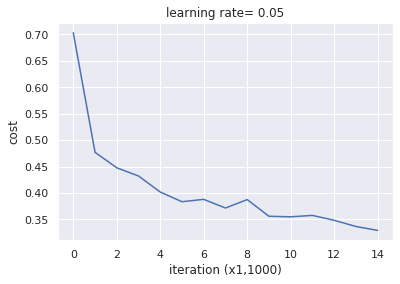

In [243]:
parameters=model_com(X_tl.T,y_tl.T,learning_rate=0.05,num_iters=15000,lambd=0.07,keep_prob=1,print_cost=True)

In [228]:
(parameters)

{'W1': array([[ 1.00802837e-01, -6.45183072e-02, -2.18813960e-01,
         -2.00676485e-01, -2.26687942e-01, -2.34789736e-02,
         -1.45670278e-02,  5.39903552e-02],
        [-3.20111991e-01,  4.07984969e-02, -1.73085457e-01,
         -1.78957122e-01, -1.52596982e-01, -1.13137181e-01,
          7.16521497e-02, -1.10880139e-01],
        [-7.88319922e-02, -3.97047124e-01,  1.89825849e-01,
         -4.44226219e-02, -1.20072306e-01, -3.60781809e-01,
          4.24839990e-01,  1.21970160e-01],
        [-5.07680779e-01,  2.88412853e-01, -1.73152996e+00,
          1.54438627e-01, -1.32945838e-01,  1.08876372e+00,
          1.07871730e+00,  1.56649238e-01],
        [-2.18748176e-03, -4.07680492e-01, -2.21242637e-02,
          3.84014131e-02, -1.47544735e-01, -2.63181950e-01,
          2.89180804e-01,  4.35525647e-01],
        [-7.35730908e-02, -7.80623368e-02, -1.90803304e-02,
         -1.29924317e-01, -9.85471630e-02, -1.38875840e-02,
         -1.87926789e-01, -9.54330280e-02],
        [-

In [230]:
X_dev=X_dev.T

In [200]:
y_dev=y_dev.T

In [205]:
Y.shape

(1, 891)

In [244]:
Y_prediction_test = predict(parameters, X_test)

In [245]:
Y_prediction_test.shape

(1, 418)

In [246]:
metrics.accuracy_score(y_dev.T,Y_prediction_test.T)

ValueError: Found input variables with inconsistent numbers of samples: [179, 418]

In [247]:
metrics.accuracy_score(y_test,Y_prediction_test.T)

0.8492822966507177

In [249]:
y_test

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [250]:
Y_prediction_test.T

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [251]:
y_pred=predict(parameters,X_test)

In [252]:
y_pred.shape

(1, 418)

In [183]:
st=Y_prediction_test

In [141]:
lm=list(st)

In [253]:
l=y_pred.T

In [254]:
l.shape

(418, 1)

In [175]:
y_test=pd.read_csv('/home/aman/Downloads/titanic/gender_submission.csv')

In [176]:
y_test=y_test.drop(['PassengerId'],axis=1)

In [177]:
y_test=np.array(y_test)

In [178]:
y_t=y_test.T

In [179]:
y_t.shape

(1, 418)

In [156]:
y_t.shapeAl,caches=forword_propagation(X,parameters)

(1, 418)

In [132]:
from array import *

In [186]:
l.shape

(418, 1)

In [255]:
lm=l.tolist()

In [256]:
lm[4]==[1.0]

True

In [257]:
ant=[]
for i in lm:
    if i==[1.0]:
        ant.append(1)
    else:
        ant.append(0)

In [258]:
l

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [189]:
ant.shape

AttributeError: 'list' object has no attribute 'shape'

In [156]:
a=np.array([1,2,3,4])
b=np.array([11,22,33,44])

In [158]:
ra=[a,b]

In [161]:
(np.random.shuffle())

In [163]:
t

In [259]:
aman=list(zip(passengerID,ant))

In [260]:
aman

[(892, 0),
 (893, 0),
 (894, 0),
 (895, 0),
 (896, 1),
 (897, 0),
 (898, 0),
 (899, 0),
 (900, 1),
 (901, 0),
 (902, 0),
 (903, 0),
 (904, 1),
 (905, 0),
 (906, 1),
 (907, 1),
 (908, 0),
 (909, 0),
 (910, 0),
 (911, 1),
 (912, 0),
 (913, 1),
 (914, 1),
 (915, 0),
 (916, 0),
 (917, 0),
 (918, 1),
 (919, 0),
 (920, 0),
 (921, 0),
 (922, 0),
 (923, 0),
 (924, 0),
 (925, 0),
 (926, 0),
 (927, 0),
 (928, 0),
 (929, 0),
 (930, 0),
 (931, 0),
 (932, 0),
 (933, 0),
 (934, 0),
 (935, 1),
 (936, 1),
 (937, 0),
 (938, 0),
 (939, 0),
 (940, 1),
 (941, 0),
 (942, 0),
 (943, 0),
 (944, 1),
 (945, 0),
 (946, 0),
 (947, 0),
 (948, 0),
 (949, 0),
 (950, 0),
 (951, 1),
 (952, 0),
 (953, 0),
 (954, 0),
 (955, 1),
 (956, 1),
 (957, 1),
 (958, 1),
 (959, 0),
 (960, 0),
 (961, 0),
 (962, 1),
 (963, 0),
 (964, 0),
 (965, 0),
 (966, 1),
 (967, 0),
 (968, 0),
 (969, 1),
 (970, 0),
 (971, 1),
 (972, 1),
 (973, 0),
 (974, 0),
 (975, 0),
 (976, 0),
 (977, 0),
 (978, 0),
 (979, 0),
 (980, 1),
 (981, 1),
 (982, 1),

In [261]:
am=pd.DataFrame(aman,columns=['PassengerId','Survived'])

In [262]:
am.to_csv (r'/home/aman/Downloads/titanic/output.csv', index = False, header=True)

In [167]:
rm=np.multiply(st.T,psgID)


In [173]:
count

147

In [107]:
psgID=np.array(passengerID)

In [108]:
psgID=psgID.reshape((418,1))

In [109]:
psgID.shape

(418, 1)

In [164]:
test.shape

(418, 8)

In [165]:
X_test=np.array(test)

In [166]:
X_test.shape

(418, 8)

In [167]:
X_test=X_test.T

In [168]:
X_test.shape

(8, 418)

In [160]:
passengerID=test['PassengerId']

In [161]:
test=test.drop(['PassengerId'],axis=1)

In [162]:
test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,2.0,7.8292,2.0,2,0,0.0
1,3,1,3.0,7.0000,2.0,0,2,0.4
2,2,0,3.0,9.6875,2.0,2,0,0.0
3,3,0,2.0,8.6625,2.0,0,0,0.0
4,3,1,1.0,12.2875,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...
413,3,0,2.0,8.0500,2.0,0,0,0.0
414,1,1,3.0,108.9000,0.8,1,3,0.0
415,3,0,3.0,7.2500,2.0,0,0,0.0
416,3,0,2.0,8.0500,2.0,0,0,0.0
